# Setup

In [5]:
!pip install --ignore-installed --upgrade tensorflow

  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)
     ----------------------               169.2/266.3 MB 689.2 kB/s eta 0:02:21


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\http\client.py", line 465, in read
    n = self.readinto(b)
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\http\client.py", line 509, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\ssl.py", line 1071, in recv_into
    return sel

  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)
     -------------------------------------- 266.3/266.3 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 896.6/896.6 kB 2.1 MB/s eta 0:00:00
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 536.5 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
     ---------------------------------------- 3.7/3.7 MB 2.0 MB/s eta 0:00:00
     ------------------

In [7]:
!pip install -U scikit-learn scipy matplotlib

     ---------------------------------------- 7.1/7.1 MB 1.9 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 968.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install keras-visualizer

In [5]:
pip install gdown


     -------------------------------------- 78.5/78.5 kB 437.4 kB/s eta 0:00:00
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


# library

In [90]:
import os
import cv2
import glob
import math
import random
import tensorflow
import numpy as np
from sklearn import svm
from keras import layers
from keras import models
from skimage import feature
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python import image
from keras.utils import to_categorical
from keras_visualizer import visualizer 
from keras.layers.core.dense import Dense
from sklearn.metrics import accuracy_score
from keras.utils.vis_utils import plot_model
from tensorflow.python.ops.math_ops import add
from keras.engine.sequential import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers.serialization import activation
from tensorflow.python.ops.math_ops import Sigmoid
from sklearn.model_selection import train_test_split
from keras.layers.convolutional.base_separable_conv import activations

# Part1.compatness

In [92]:
def compatness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adaptive_output = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 55, 15
    )
    opening_output = cv2.morphologyEx(adaptive_output, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    closing_output = cv2.morphologyEx(opening_output, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    contours, hierarchy = cv2.findContours(closing_output, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    biggest_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0]
#     contours_drawing = np.zeros_like(closing_output)
#     cv2.drawContours(contours_drawing, [biggest_contour], -1, (255,0,0), 3)
#     plt.imshow(contours_drawing)
#     plt.show()
    compactness_score = 4 * math.pi * cv2.arcLength(biggest_contour, True) / cv2.contourArea(biggest_contour, False)
    return compactness_score
# compatness(cv2.imread("dataset\\ship\\613378.jpg"))

2.731171935420989

# Part2.eccenticity

In [99]:
def eccenticity(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adaptive_output = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 55, 15
    )
    opening_output = cv2.morphologyEx(adaptive_output, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    closing_output = cv2.morphologyEx(opening_output, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    contours, hierarchy = cv2.findContours(closing_output, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    biggest_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0]
    x, y, w, h = cv2.boundingRect(biggest_contour)
    min_axis_len = min(w, h)
    maj_axis_len = max(w, h)
    eccentricity_score = math.sqrt(1 - (min_axis_len / maj_axis_len)**2)
    return eccentricity_score
#eccenticity(cv2.imread("dataset\\ship\\613378.jpg"))

0.8960751222013684

# Part3.solidity

In [100]:
def solidity(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adaptive_output = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 55, 15
    )
    opening_output = cv2.morphologyEx(adaptive_output, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    closing_output = cv2.morphologyEx(opening_output, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    contours, hierarchy = cv2.findContours(closing_output, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    biggest_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0]
    solidity_score = cv2.contourArea(biggest_contour) / cv2.contourArea(cv2.convexHull(biggest_contour))
    return solidity_score
#solidity(cv2.imread("dataset\\ship\\613378.jpg"))

0.32650551612676554

# Part4.LBP

In [142]:
def histogram_of_LBP(image, numPoints, radius, eps=1e-7):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    LBPs = feature.local_binary_pattern(gray, numPoints, radius)
    n = int(LBPs.max() + 1)
    hist_values, _ = np.histogram(LBPs, bins=n, range=(0, n))
    #plt.plot(hist_values)
    return hist_values
#histogram_of_LBP(cv2.imread("dataset\\ship\\613378.jpg"), 16, 2)

# validate function

In [121]:
def validating_func(image_ship_path, image_airplane_path):
    ship_img = cv2.imread(image_ship_path)
    airplane_img = cv2.imread(image_airplane_path)
    eccenticity_ship, eccenticity_airplane = eccenticity(ship_img), eccenticity(airplane_img)
    compatness_ship, compatness_airplane = compatness(ship_img), compatness(airplane_img)
    solidity_ship, solidity_airplane = solidity(ship_img), solidity(airplane_img)
    print(f"Result for ship image:\ncompatness is : {compatness_ship}\t\teccenticity is : {eccenticity_ship}\t\tsolidity is : {solidity_ship}")
    print(f"Result for airplane image:\ncompatness is : {compatness_airplane}\t\teccenticity is : {eccenticity_airplane}\t\tsolidity is : {solidity_airplane}")
  

# Part5.prepare dataset(just run this cell and not change)

In [114]:
!gdown --id 1O_VkcGlWRR6h00VT8nXIgeI3RyvBpXbE
!unzip dataset.zip
classes = os.listdir("dataset")
images_paths = glob.glob("dataset\\*\\*")

C:\Users\Amiri\anaconda3\envs\FCV_mohammadi\lib\site-packages\gdown\cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O_VkcGlWRR6h00VT8nXIgeI3RyvBpXbE
To: C:\Users\Amiri\Documents\semester7\Computer Vision\HW\HW[10]\dataset.zip

  0%|          | 0.00/18.4M [00:00<?, ?B/s]
  3%|2         | 524k/18.4M [00:00<00:19, 935kB/s]
  6%|5         | 1.05M/18.4M [00:00<00:11, 1.56MB/s]
  9%|8         | 1.57M/18.4M [00:00<00:07, 2.12MB/s]
 11%|#1        | 2.10M/18.4M [00:01<00:06, 2.66MB/s]
 14%|#4        | 2.62M/18.4M [00:01<00:05, 2.97MB/s]
 17%|#7        | 3.15M/18.4M [00:01<00:04, 3.20MB/s]
 20%|#9        | 3.67M/18.4M [00:01<00:04, 3.43MB/s]
 23%|##2       | 4.19M/18.4M [00:01<00:04, 3.52MB/s]
 26%|##5       | 4.72M/18.4M [00:01<00:03, 3.59MB/s]
 29%|##8       | 5.24M/18.4M [00:01<00:03, 3.35MB/s]
 34%|###4      | 

Archive:  dataset.zip
   creating: dataset/              
   creating: dataset/airplane/     
  inflating: dataset/airplane/airplane1.jpg  
  inflating: dataset/airplane/airplane136.jpg  
  inflating: dataset/airplane/airplane14.jpg  
  inflating: dataset/airplane/airplane141.jpg  
  inflating: dataset/airplane/airplane153.jpg  
  inflating: dataset/airplane/airplane156.jpg  
  inflating: dataset/airplane/airplane157.jpg  
  inflating: dataset/airplane/airplane159.jpg  
  inflating: dataset/airplane/airplane169.jpg  
  inflating: dataset/airplane/airplane170.jpg  
  inflating: dataset/airplane/airplane182.jpg  
  inflating: dataset/airplane/airplane184.jpg  
  inflating: dataset/airplane/airplane185.jpg  
  inflating: dataset/airplane/airplane188.jpg  
  inflating: dataset/airplane/airplane194.jpg  
  inflating: dataset/airplane/airplane195.jpg  
  inflating: dataset/airplane/airplane196.jpg  
  inflating: dataset/airplane/airplane198.jpg  
  inflating: dataset/airplane/airplane199.jpg

In [119]:
x_data , y_data = [], []
for img_path in images_paths:
    x_data.append(cv2.resize(cv2.imread(img_path), (224,224)))
    if img_path.split("\\")[1] == "ship":
        y_data.append(0)
    else:
        y_data.append(1)  

In [120]:
 x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size = 0.2, shuffle= True)

# Part6. Exctract features and determine classifier

In [140]:
def get_featureMatrix(data):
    feature_matrix = [[compatness(img), eccenticity(img), solidity(img), *histogram_of_LBP(img, 16, 2)] for img in data]
    return feature_matrix

In [146]:
# model 1
feature_matrix_train = get_featureMatrix(x_train)
#determine classifier and train 
clf = svm.SVC()
clf.fit(feature_matrix_train, y_train)

SVC()

# Part7

In [147]:
#test on test dataset
y_pred = clf.predict(get_featureMatrix(x_test))
accuracy_score(y_test, y_pred)

0.78125

# Part8

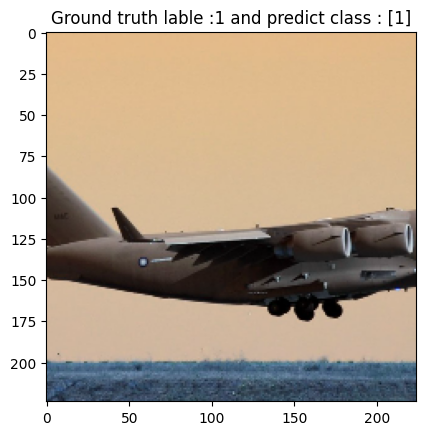

In [148]:
#test visualize
index = random.randint(0, len(x_test)-1)
prediction = clf.predict(get_featureMatrix(np.array([x_test[index]])))
plt.title(f"Ground truth lable :{y_test[index]} and predict class : {prediction}")
plt.imshow(x_test[index])
plt.show()